<a href="https://colab.research.google.com/github/dynasty-29/Hypothyroidism_prediction/blob/main/Hypothyroidism_testing_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

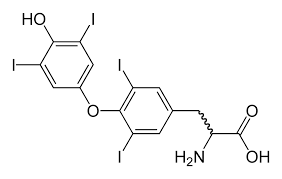
# **Introduction**
Hypothyroidism is a common condition where the thyroid doesn’t create and release enough thyroid hormone into your bloodstream. This makes your metabolism slow down. Also called underactive thyroid, hypothyroidism can make you feel tired, gain weight and be unable to tolerate cold temperatures.
Hypothyroidism can have a primary cause or a secondary cause. A primary cause is a condition that directly impacts the thyroid and causes it to create low levels of thyroid hormones (thyroxine (**T4**) and triiodothyronine (**T3**)). A secondary cause is something that causes the pituitary gland to fail, which means it can’t send thyroid stimulating hormone (**TSH**) to the thyroid to balance out the thyroid hormones.

Primary causes of hypothyroidism are much more common. The most common of these primary causes is an autoimmune condition called Hashimoto’s disease. Also called Hashimoto’s thyroiditis or chronic lymphocytic thyroiditis, this condition is hereditary (passed down through a family). In Hashimoto’s disease, the body’s immune system attacks and damages the thyroid. This prevents the thyroid from making and releasing enough thyroid hormone.

The other primary causes of hypothyroidism can include:

Thyroiditis (inflammation of the thyroid); 
Treatment of hyperthyroidism (radiation and surgical removal of the thyroid); 
Iodine deficiency (not having enough iodine — a mineral your thyroid uses to make hormones – in your body);
Hereditary conditions (a medical condition passed down through your family).

# **Problem Statement**
Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. As the data scientist my objective is to use the healthcare datasets provided to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# **Objective**
Determining the different indicators of hypothyroidism

## **Metrics of success**
* Read and explore the given dataset.

* Finding and dealing with outliers, anomalies, and missing data within the dataset.

* Performing univariate, bivariate and multivariate analysis.

* Performing SVm and Decision tree models and choosing the best model with the highest accuracy rate above 90%.


* Providing recommendation based the analysis.

* Challenge the solution by providing insights on how you can make improvements in model improvement.

# **Data Understanding**
* Will import important libraries
* Will load our dataset

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
tsh = pd.read_csv('hypothyroid.csv')

In [3]:
#Viewing first five rows
tsh.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#last five rows
tsh.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
#Number of records in the data 
tsh.shape

(3163, 26)

We have 26 columns and 3163 rows

# **Data Preparation**

**1. Validity check**

In [6]:
#check how te columns look like
tsh.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

well labelled columns

**2. Accuracy check**

In [7]:
#checking the data types
tsh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [8]:
# Changing bool columns  for efficiency with numerical

# Boolean columns list
bool_cols = ['on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',\
            'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre']

# Replacing bool columns with True as 1 or False as o value
#
for column in bool_cols:
  tsh[column] = tsh[column].replace('f', 0)
  tsh[column] = tsh[column].replace('t', 1)
  
  
# Previewing the column datatypes to check whether the changes have been effected
#
tsh.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                  int64
query_on_thyroxine            int64
on_antithyroid_medication     int64
thyroid_surgery               int64
query_hypothyroid             int64
query_hyperthyroid            int64
pregnant                      int64
sick                          int64
tumor                         int64
lithium                       int64
goitre                        int64
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

**3. Completeness check**

In [9]:
#Check for null values
tsh.isnull().sum().sum()

0

 we don't have actual null values but we have "?" values in our columns we are going to replace them accordingly

In [10]:
# first Replacing the '?' character in the dataframe with NAN
#
tsh.replace('?', np.nan, inplace=True)


In [11]:
#noe check for nulls
tsh.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

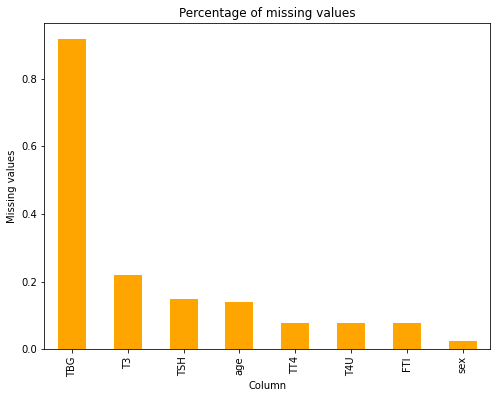

In [12]:
# Visualising missing values
#
tsh.isna().mean().round(4).sort_values(ascending = False)[:8].plot(kind = 'bar', figsize = (8, 6), color = 'Orange')
plt.title('Percentage of missing values')
plt.ylabel('Missing values')
plt.xlabel('Column')
plt.show()

Now we have nulls and will replace them rather than dropping since they are important. However the TBG column has highest number of null so will drop that column. The numerical columns will replace with mean while the categorical will replace by mode

In [13]:
#we will replace the NAN on age column with the mode age 
tsh['sex'].replace([np.nan], tsh['sex'].mode(), inplace=True)

In [14]:
#changing float columns from object to float
tsh["TSH"] = tsh.TSH.astype(float)
tsh["T3"] = tsh.T3.astype(float)
tsh["TT4"] = tsh.TT4.astype(float)
tsh["T4U"] = tsh.T4U.astype(float)
tsh["FTI"] = tsh.FTI.astype(float)
tsh["age"] = tsh.age.astype(float)

In [15]:
#we will replace the NAN on numerical column with the mean  
tsh['T3'].replace([np.nan], tsh['T3'].mean(), inplace=True)
tsh['TSH'].replace([np.nan], tsh['TSH'].mean(), inplace=True)
tsh['age'].replace([np.nan], tsh['age'].mean(), inplace=True)
tsh['T4U'].replace([np.nan], tsh['T4U'].mean(), inplace=True)
tsh['TT4'].replace([np.nan], tsh['TT4'].mean(), inplace=True)
tsh['FTI'].replace([np.nan], tsh['FTI'].mean(), inplace=True)

In [16]:
#checking if the above changes have taken place
tsh.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
T4U_measured                    0
T4U                             0
FTI_measured                    0
FTI                             0
TBG_measured                    0
TBG                          2903
dtype: int64

In [17]:
#changing float columns from object to float
tsh["TSH"] = tsh.TSH.astype(float)
tsh["T3"] = tsh.T3.astype(float)
tsh["TT4"] = tsh.TT4.astype(float)
tsh["T4U"] = tsh.T4U.astype(float)
tsh["FTI"] = tsh.FTI.astype(float)
tsh["age"] = tsh.age.astype(float)

We now have no more missing values other than the TBG column which we dropping next

In [18]:
#Dropping tbg
tsh = tsh.drop(['TBG','TBG_measured'], axis=1)

**4. Consistency check**

In [19]:
#We check if we have any duplicates
tsh.duplicated().sum()

156

In [20]:
# Previewing the first five rows of the duplicated data
#
tsh[tsh.duplicated()].head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
53,hypothyroid,69.0,F,0,0,0,0,0,0,0,...,y,21.0,y,0.800000,y,53.0,y,0.86,y,61.0
66,hypothyroid,62.0,M,0,0,0,0,0,0,0,...,y,100.0,y,0.400000,y,10.0,y,1.00,y,10.0
124,hypothyroid,77.0,F,0,0,0,0,0,0,0,...,y,23.0,y,0.500000,y,33.0,y,0.67,y,49.0
128,hypothyroid,79.0,F,0,0,0,0,0,0,0,...,y,29.0,y,1.600000,y,47.0,y,0.97,y,48.0
131,hypothyroid,50.0,F,1,0,0,0,0,0,0,...,y,34.0,n,1.939749,y,55.0,y,0.93,y,60.0


In [21]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
#
tsh.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
#
tsh.duplicated().any()

False

**5. Uniformity check**

In [22]:
tsh.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

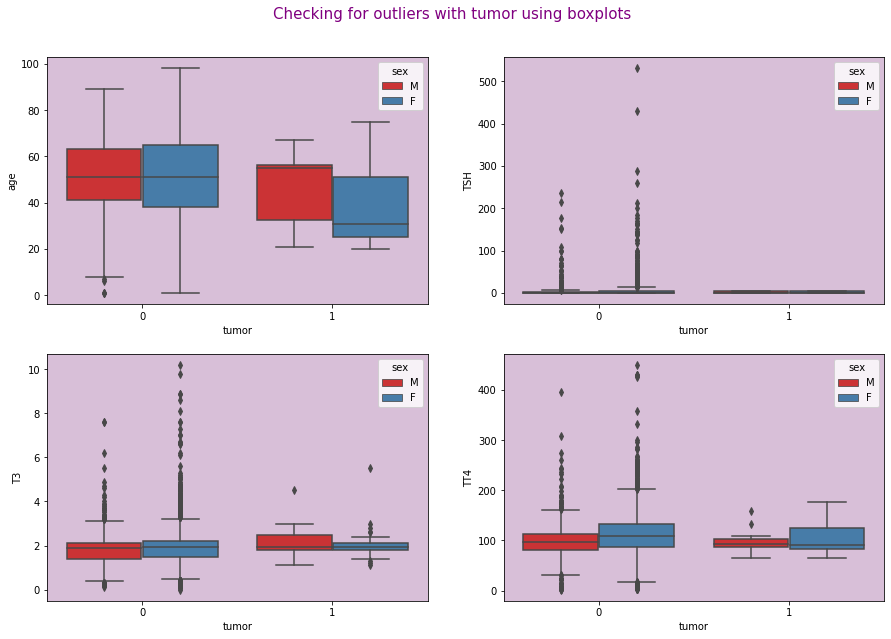

In [23]:
#checking for outliers
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers with tumor using boxplots', fontsize = 15, y = 0.95, color = 'purple')
for ax, data, column in zip(axes.flatten(), tsh, num_cols):
  sns.boxplot(tsh.tumor, tsh[column], ax = ax, hue = tsh.sex, palette = 'Set1')
  ax.set_facecolor('thistle') 

we can see:
* There is are no outliers in the age column
* The TSH column has the most outliers when compared with t3 and tt4, when tumor diagnosis is negative
* Across the t3, tt4 and tsh columns, outliers are more pronounced when diagnosis for tumor is negative

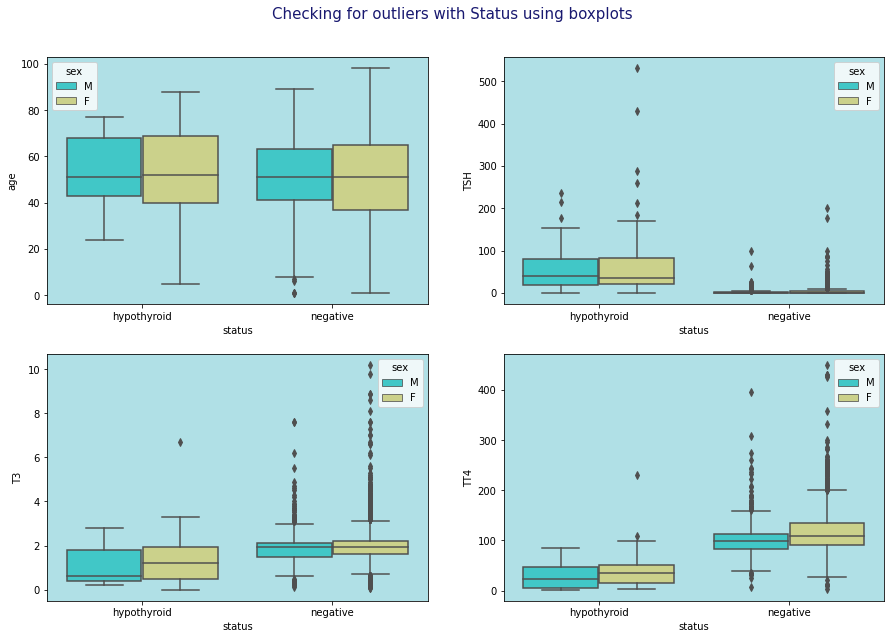

In [24]:
# Plotting boxplots to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers with Status using boxplots', fontsize = 15, y = 0.95, color = 'midnightblue')
for ax, data, column in zip(axes.flatten(), tsh, num_cols):
  sns.boxplot(tsh.status, tsh[column], ax = ax, hue = tsh.sex, palette = 'rainbow')
  ax.set_facecolor('powderblue') 

* Age distribution is approximately the same irrespective of whether a person has hypothyroid or not
* The tsh column has the most outliers when compared with t3 and tt4, when hypothyroid diagnosis is positive
* Across the t3, tt4 columns, outliers are more pronounced when diagnosis for hypothyroid is negative

# **EXPLORATORY DATA ANALYSIS**

**1. Univarite Analysis**

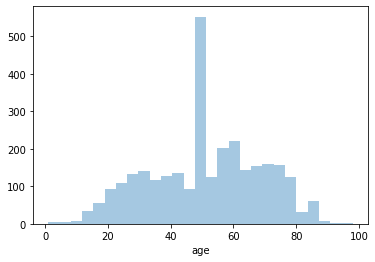

In [25]:
#Age distplot
sns.distplot(tsh['age'],  kde=False,label='Age')

Most of the people who attended the camp had an age range of 20 to 85 with age 50 having the highest number of attendee

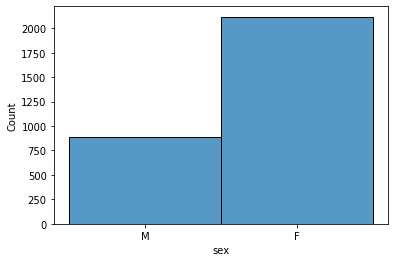

In [26]:
#Gender distplot
sns.histplot(tsh['sex'])

More females showed up compared to men

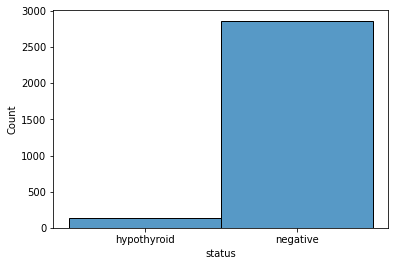

In [27]:
#Status distplot
sns.histplot(tsh['status'])

Among the attendees most of them had a negative outcome

**2. Bivariate Analysis**

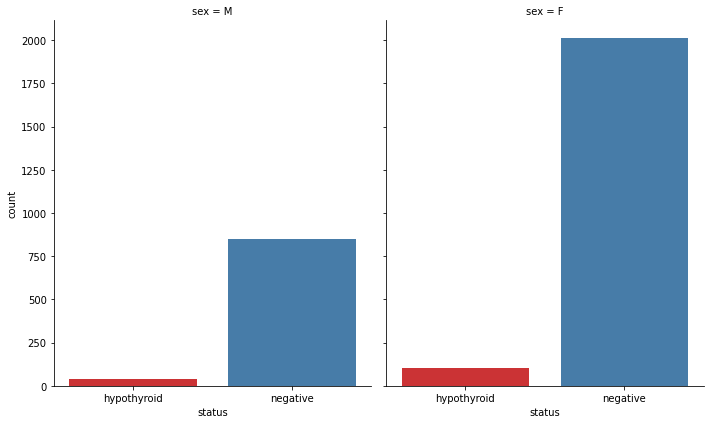

In [28]:
# Visual comparison of gender versus status
#
sns.catplot("status", col="sex", col_wrap=4, data=tsh, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

There were more female and also most of the positive diagnosis was from females too

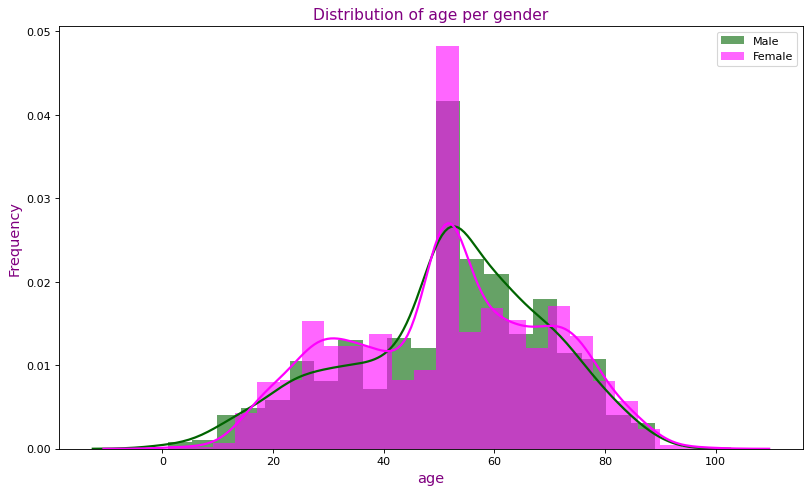

In [29]:
# Plotting histogram to show distribution of age per gender
# 
male = tsh.loc[tsh.sex=='M', 'age']    # Selecting only male datapoints in the age column
female = tsh.loc[tsh.sex=='F', 'age']  # Selecting only female datapoints in the age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
dfg = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **dfg)
sns.distplot(female, color="fuchsia", label="Female", **dfg)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

More females than males in total, however more males from the age of 50 compared to females of same age

**3. Multivariate Analysis**

In [30]:
tsh.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [31]:
tsh.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3007.0,51.350030,17.864731,1.0,38.00,51.154214,64.00,98.00
on_thyroxine,3007.0,0.148321,0.355477,0.0,0.00,0.000000,0.00,1.00
query_on_thyroxine,3007.0,0.018291,0.134023,0.0,0.00,0.000000,0.00,1.00
on_antithyroid_medication,3007.0,0.013967,0.117375,0.0,0.00,0.000000,0.00,1.00
thyroid_surgery,3007.0,0.034253,0.181910,0.0,0.00,0.000000,0.00,1.00
query_hypothyroid,3007.0,0.078151,0.268454,0.0,0.00,0.000000,0.00,1.00
query_hyperthyroid,3007.0,0.075491,0.264225,0.0,0.00,0.000000,0.00,1.00
pregnant,3007.0,0.020286,0.141000,0.0,0.00,0.000000,0.00,1.00
sick,3007.0,0.032258,0.176714,0.0,0.00,0.000000,0.00,1.00
tumor,3007.0,0.013302,0.114585,0.0,0.00,0.000000,0.00,1.00


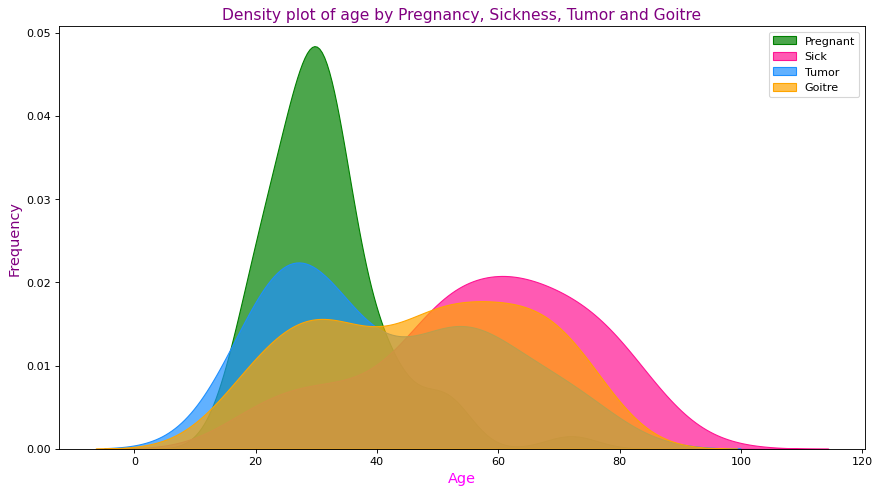

In [32]:
# Plotting Kernel Density Estimate plots for pregnant, sick, tumor and goitre persons
# Setting the figuresize of the graph to 13 in length and 7 in height
#
plt.figure(figsize=(13,7), dpi= 80)
sns.kdeplot(tsh.loc[tsh['pregnant'] == True, "age"], shade=True, color="g", label="Pregnant", alpha=.7)
sns.kdeplot(tsh.loc[tsh['sick'] == True, "age"], shade=True, color="deeppink", label="Sick", alpha=.7)
sns.kdeplot(tsh.loc[tsh['tumor'] == True, "age"], shade=True, color="dodgerblue", label="Tumor", alpha=.7)
sns.kdeplot(tsh.loc[tsh['goitre'] == True, "age"], shade=True, color="orange", label="Goitre", alpha=.7)
plt.title('Density plot of age by Pregnancy, Sickness, Tumor and Goitre', fontsize=14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'magenta')
plt.ylabel('Frequency', color = 'purple', fontsize = 13)
plt.legend()
plt.show()

* Majority of women who are pregnant lie between the ages of approximately 18 and 40 with a spike between 20 to 38 which as per the normal population is the most favored age for pregnancy.
* The distribution of sick people is skewed to the left
* Distribution of people with goitre is normally distributed

<Figure size 480x320 with 0 Axes>

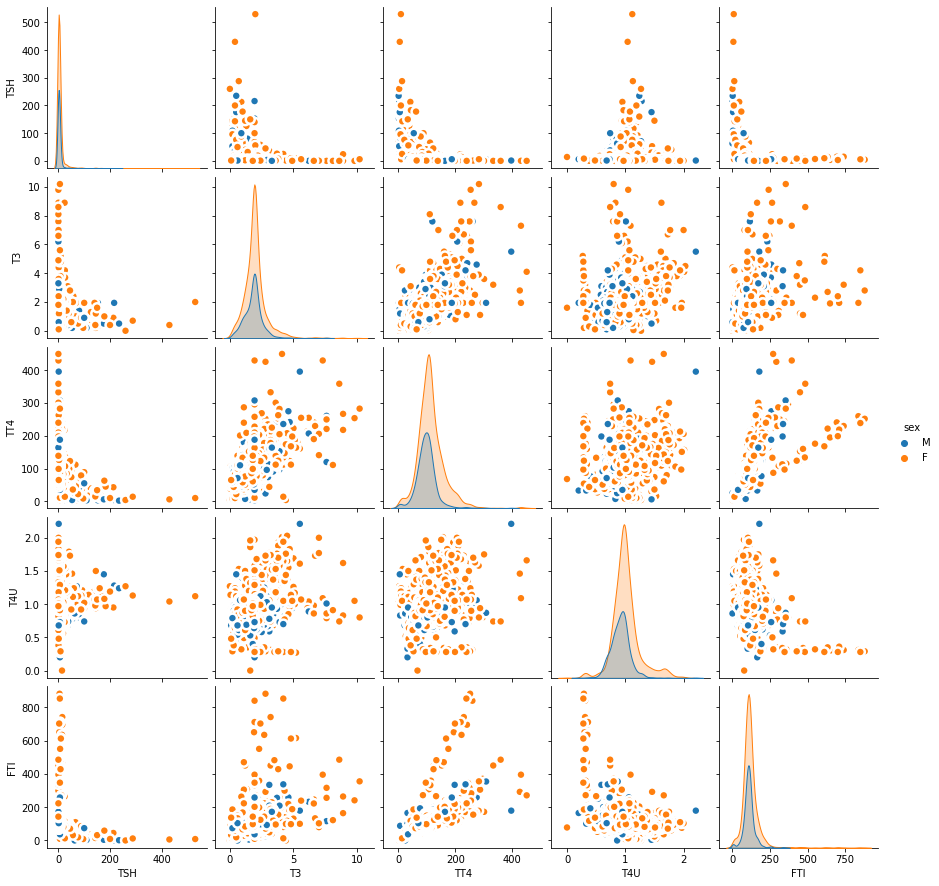

In [33]:
#Visual of the diferent determinants of hypothyroidism
plt.figure(dpi= 80)
sns.pairplot(tsh[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex']], kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

It's clear T3 has some what linear relationship with TT4, T4U, and FTI.

TT4 has some what linear relationship with T4U and FTI.

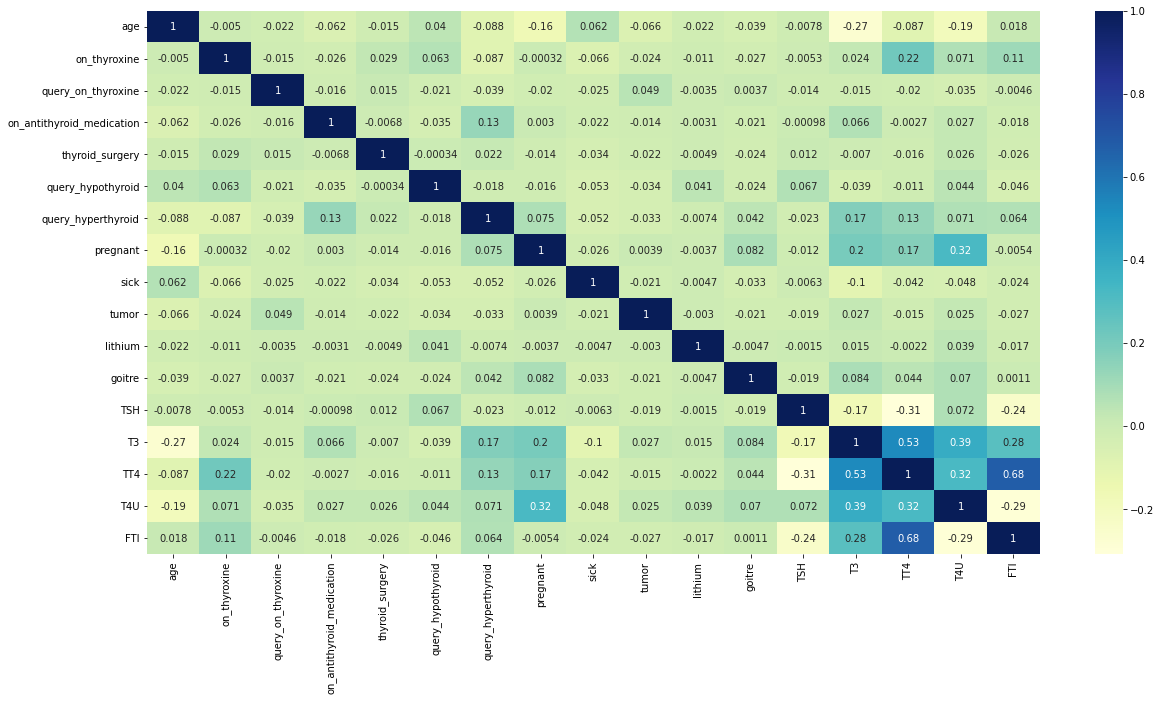

In [34]:
# plotting the correlation using a heatmap
fig, ax = plt.subplots(figsize=(20,10))  
sns.heatmap(tsh.corr(), cmap="YlGnBu", annot=True)

From the introduction the thyroid hormones are T3, T4, Tsh, FTI and from the aboce correlation there is a strong correlation between TT4 and FTI, T3 and TT4, T3 and T4U, T3 and FTI

# **MODELING**

## **1. Decision Trees**

In [35]:
tsh['TSH_measured'].value_counts()

y    2631
n     376
Name: TSH_measured, dtype: int64

In [36]:
tsh.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [37]:
#changing the boolen to 0 and 1
tsh = tsh.replace({'on_thyroxine': {True: 1,
                                    False: 0}})
  

In [38]:
tsh = tsh.replace({'query_on_thyroxine': {True: 1,
                                    False: 0}})

In [39]:
tsh = tsh.replace({'on_antithyroid_medication': {True: 1,
                                    False: 0}})

In [40]:
tsh = tsh.replace({'thyroid_surgery': {True: 1,
                                    False: 0}})

In [41]:
tsh = tsh.replace({'query_hypothyroid': {True: 1,
                                    False: 0}})

In [42]:
tsh = tsh.replace({'query_hyperthyroid': {True: 1,
                                    False: 0}})

In [43]:
tsh = tsh.replace({'pregnant': {True: 1,
                                    False: 0}})

In [44]:
tsh = tsh.replace({'sick': {True: 1,
                                    False: 0}})

In [45]:
tsh = tsh.replace({'tumor': {True: 1,
                                    False: 0}})

In [46]:
tsh = tsh.replace({'lithium': {True: 1,
                                    False: 0}})

In [47]:
tsh = tsh.replace({'goitre': {True: 1,
                                    False: 0}})

In [48]:
tsh = tsh.replace({'TSH_measured': {'y': 1,
                                    'n': 0}})

In [49]:
tsh = tsh.replace({'T3_measured': {'y': 1,
                                    'n': 0}})

In [50]:
tsh = tsh.replace({'TT4_measured': {'y': 1,
                                    'n': 0}})

In [51]:
tsh = tsh.replace({'T4U_measured': {'y': 1,
                                    'n': 0}})

In [52]:
tsh = tsh.replace({'FTI_measured': {'y': 1,
                                    'n': 0}})

In [53]:
tsh = tsh.replace({'sex': {'F': 1,
                            'M': 0}})

In [54]:
tsh.head(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,0,0,0,0,0,0,0,0,...,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,hypothyroid,15.0,1,1,0,0,0,0,0,0,...,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0
2,hypothyroid,24.0,0,0,0,0,0,0,0,0,...,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0


**a. Random Forest**

In [55]:
#Preprocessing
X= tsh.drop(['status'], axis=1)
y = np.where(tsh.status == 'hypothyroid', 1, 0)

In [56]:
# Splitting the data into training and testing sets 25%
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [57]:
from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest11 = forest1.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest11.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()


,Actual,Predicted
count,752.000000,752.000000
mean,0.042553,0.035904
std,0.201982,0.186175
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


We can see there is not than much difference of what predicted to the actual

In [58]:
# And now we assess the errors

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.988031914893617


We have a 98% accuracy that's pretty good

In [59]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
df = pd.DataFrame({'feature': X.columns, 'importance': np.round(forest11.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
df

,importance
feature,
FTI,0.3682
TSH,0.2796
TT4,0.2364
T3,0.0590
T4U,0.0183
age,0.0105
TSH_measured,0.0084
on_antithyroid_medication,0.0044
query_hypothyroid,0.0027


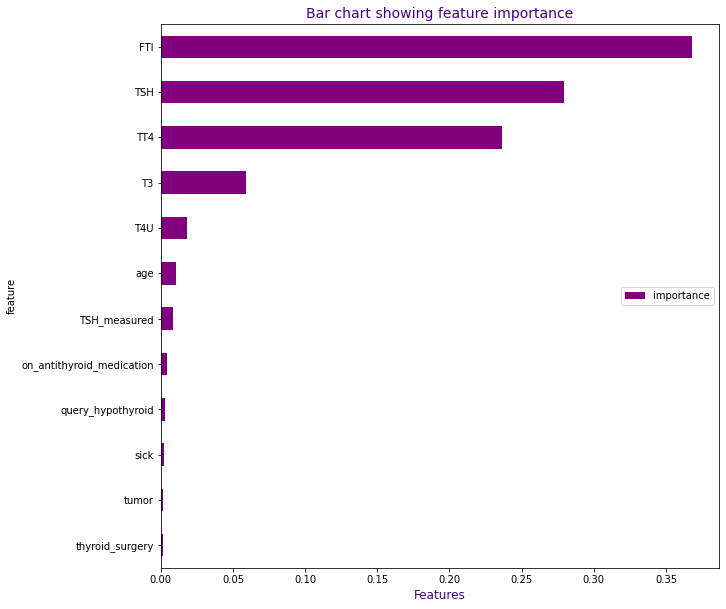

In [60]:
# Creating a bar chart of feature importance in descending order
#
df = df[:12].sort_values(by = 'importance', ascending = True)
df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()


Remodelling with important features

In [61]:
# Selecting only important features and the y variable
#
X = X[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured']]

y = np.where(tsh.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
forst = RandomForestClassifier(random_state = 0)
forst.fit(X_train, y_train)

# Making predictions
#
y_pred = forst.predict(X_test)


In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
#Evaluating our model
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
    classification_report(y_test, y_pred))

Confusion Matrix:  [[862   6]
 [  2  33]]
Accuracy :  99.1140642303433
Report :                precision    recall  f1-score   support

           0       1.00      0.99      1.00       868
           1       0.85      0.94      0.89        35

    accuracy                           0.99       903
   macro avg       0.92      0.97      0.94       903
weighted avg       0.99      0.99      0.99       903



with Important feature our model makes 99% accuracy

Performing parameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score

In [64]:
# Previewing the parameters to tune
#
RandomForestClassifier()

RandomForestClassifier()

In [65]:
# Creating a dictionary of parameters to tune
#
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 100}


In [66]:
# Applying the best parameters to the model
#
# Selecting only important features and the y variable
#
X = X[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured']]

y = np.where(tsh.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

#
#Evaluating our model
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
print("Report : ",
    classification_report(y_test, y_pred))

Confusion Matrix:  [[863   5]
 [  4  31]]
Accuracy :  99.00332225913621
Report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.86      0.89      0.87        35

    accuracy                           0.99       903
   macro avg       0.93      0.94      0.93       903
weighted avg       0.99      0.99      0.99       903



99% accuracy with this model

**b. ADA boost**

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

ada_boostc1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=0)

ada_boostd = ada_boostc1.fit(X_train, y_train)
y_pred_ada = ada_boostd.predict(X_test)


In [68]:
#Evaluating our model
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred_ada))
      
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_ada)*100)
      
print("Report : ",
    classification_report(y_test, y_pred_ada))

Confusion Matrix:  [[862   6]
 [  4  31]]
Accuracy :  98.89258028792912
Report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.84      0.89      0.86        35

    accuracy                           0.99       903
   macro avg       0.92      0.94      0.93       903
weighted avg       0.99      0.99      0.99       903



Ada boost also gives us a 99% accuracy

**c. Gradient boosted**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 300

gbr = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)


In [70]:
#Evaluating our model
print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred_gbr))
      
print ("Accuracy : ",
    accuracy_score(y_test,y_pred_gbr)*100)
      
print("Report : ",
    classification_report(y_test, y_pred_gbr))

Confusion Matrix:  [[860   8]
 [  4  31]]
Accuracy :  98.67109634551495
Report :                precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.79      0.89      0.84        35

    accuracy                           0.99       903
   macro avg       0.90      0.94      0.92       903
weighted avg       0.99      0.99      0.99       903



Gradient boost give us a 99.0% accuracy

## **2. Support Vector Machine**

In [71]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [72]:
tsh.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI'],
      dtype='object')

In [73]:
predictor = tsh.drop(['status'], axis=1)
y = tsh['status']

In [74]:
# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
X.shape

(3007, 2)

In [75]:
#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
 # Standardising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
# Instantiating and creating a list of models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']

# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc,model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]}')

The accuracy score of Polynomial is: 0.9800664451827242
The accuracy score of Linear     is: 0.982281284606866
The accuracy score of Rbf        is: 0.982281284606866


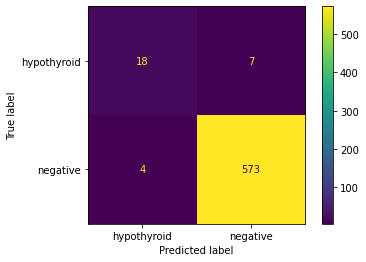

In [80]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test)
plt.show()

Our SVMKernel model had almost similar accuracy with linear and RBF having the best hence best choice for SVM approach

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Set-up 1x3 grid for plotting.
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 7))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.suptitle('Comparison of different SVC Kernels', fontsize = 15)

# title for the plots
titles = ('Polynomial kernel', 'Linear kernel', ' RBF kernel')

# Randomly selecting 300 datapoints to plot
X = X
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, axes.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('FTI')
    ax.set_ylabel('TSH')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

## **Challenging The solution**

In [81]:
# Importing different classification models
#
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Creating a list of classifier algorithms to compare with
#
models = [GradientBoostingClassifier(), DecisionTreeClassifier(), XGBClassifier(), KNeighborsClassifier(),\
          GaussianNB(), LogisticRegression()]

# Creating lists of the algorithms, to store the accuracy scores of each fold
#
GradientBoosting, DecisionTree, XGB, KNeighbors, GaussianNB, LogisticRegression = ([] for x in range(6))

# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [GradientBoosting, DecisionTree, XGB, KNeighbors, GaussianNB, LogisticRegression]

# Selecting the independent variables and the target variable
#
X = tsh.drop('status', axis = 1)
y = np.where(tsh.status == 'hypothyroid', 1, 0)

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, shuffle = True, random_state = 0)

# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'f1', cv = kfold)))
  
# Creating a dataframe of all the scores from the iterations for each model
#
scores = pd.DataFrame({'GradientBoosting': GradientBoosting, 'DecisionTree': DecisionTree, 'XGB': XGB,\
              'KNeighbors': KNeighbors, 'GaussianNB': GaussianNB, 'LogisticRegression': LogisticRegression}, index = range(1, 11))

# Calculating the mean and standard deviation score of each algorithm
#
scores.loc['mean'] = scores.mean()
scores.loc['std'] = scores.std()

# Previewing the scores dataframe
#
scores

,GradientBoosting,DecisionTree,XGB,KNeighbors,GaussianNB,LogisticRegression
1,0.923077,0.800000,0.923077,0.880000,0.099174,0.833333
2,0.846154,0.846154,0.916667,0.761905,0.105727,0.636364
3,0.869565,0.869565,0.869565,0.800000,0.095694,0.869565
4,0.975610,0.923077,0.975610,0.871795,0.171429,0.810811
5,0.864865,0.833333,0.918919,0.823529,0.138776,0.848485
6,0.909091,0.952381,0.909091,0.833333,0.094421,0.727273
7,0.909091,0.857143,0.909091,0.714286,0.126582,0.785714
8,0.857143,0.812500,0.833333,0.756757,0.146341,0.645161
9,0.952381,0.952381,0.952381,0.909091,0.084388,0.900000
10,0.952381,0.900000,1.000000,0.900000,0.082988,0.888889


We can see Ada boost is still the best model to make prediction of if a patient has or doesn't have Hypothyroidism

## **Conclusion**

* Most of the people who attended the camp had an age range of 20 to 85 with age 50 having the highest number of attendee

* Among the attendees most of them had a negative outcome

* There were more female and also most of the positive diagnosis was from females too

* Majority of women who are pregnant lie between the ages of approximately 18 and 40 with a spike between 20 to 38 which as per the normal population is the most favored child bearing age
* The distribution of sick people is skewed to the left
* Distribution of people with goitre is normally distributed

* Out of all the models used to predict whether a person has hypothyroid, the AdaBoostClassifier performs well with an accuracy of 99.1%